In [1]:
import sklearn
import sklearn.svm as svm
svm.__all__

['LinearSVC',
 'LinearSVR',
 'NuSVC',
 'NuSVR',
 'OneClassSVM',
 'SVC',
 'SVR',
 'l1_min_c']

In [2]:
import pandas as pd
xigua30a = pd.read_csv("xigua3.0.a.csv")
x=xigua30a[['密度','含糖率']].values
y=xigua30a[['好瓜']].values.flatten()
xy = sklearn.model_selection.train_test_split(x, y, random_state=123)
xy

[array([[0.437, 0.211],
        [0.697, 0.46 ],
        [0.245, 0.057],
        [0.343, 0.099],
        [0.608, 0.318],
        [0.774, 0.376],
        [0.481, 0.149],
        [0.593, 0.042],
        [0.639, 0.161],
        [0.634, 0.264],
        [0.36 , 0.37 ],
        [0.657, 0.198]]),
 array([[0.556, 0.215],
        [0.243, 0.267],
        [0.719, 0.103],
        [0.666, 0.091],
        [0.403, 0.237]]),
 array([ 1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1], dtype=int64),
 array([ 1, -1, -1, -1,  1], dtype=int64)]

In [36]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',C=1000,random_state=123)
model.fit(xy[0],xy[2])
print(model.score(xy[0],xy[2]),model.score(xy[1],xy[3]))

1.0 1.0


In [23]:
xigua30apos = xigua30a[xigua30a['好瓜']==1].values
xigua30aneg = xigua30a[xigua30a['好瓜']==-1].values
xigua30apos,xigua30aneg

(array([[0.697, 0.46 , 1.   ],
        [0.774, 0.376, 1.   ],
        [0.634, 0.264, 1.   ],
        [0.608, 0.318, 1.   ],
        [0.556, 0.215, 1.   ],
        [0.403, 0.237, 1.   ],
        [0.481, 0.149, 1.   ],
        [0.437, 0.211, 1.   ]]),
 array([[ 0.666,  0.091, -1.   ],
        [ 0.243,  0.267, -1.   ],
        [ 0.245,  0.057, -1.   ],
        [ 0.343,  0.099, -1.   ],
        [ 0.639,  0.161, -1.   ],
        [ 0.657,  0.198, -1.   ],
        [ 0.36 ,  0.37 , -1.   ],
        [ 0.593,  0.042, -1.   ],
        [ 0.719,  0.103, -1.   ]]))

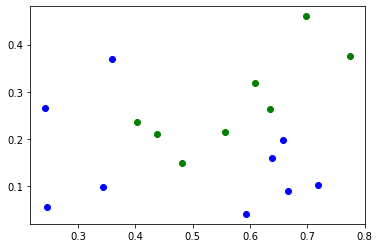

In [25]:
import  matplotlib.pyplot as plt
plt.scatter(xigua30apos[:,0],xigua30apos[:,1],c='green')
plt.scatter(xigua30aneg[:,0],xigua30aneg[:,1],c='blue')
plt.show()

In [37]:
import numpy as np
disp_scale=100.0
disp_input=[]
for i in range(int(disp_scale)):
    for j in range(int(disp_scale)):
        disp_input.append([i/disp_scale, j/disp_scale])
disp_output = model.predict(disp_input)
disp_pos = []
disp_neg = []
for x, disp_x  in zip(disp_input,disp_output):
    if disp_x==1:
        disp_pos.append(x)
    else:
        disp_neg.append(x)
disp_pos = np.array(disp_pos)
disp_neg = np.array(disp_neg)
disp_pos,disp_neg

(array([[0.37, 0.2 ],
        [0.37, 0.21],
        [0.37, 0.22],
        ...,
        [0.93, 0.51],
        [0.93, 0.52],
        [0.93, 0.53]]),
 array([[0.  , 0.  ],
        [0.  , 0.01],
        [0.  , 0.02],
        ...,
        [0.99, 0.97],
        [0.99, 0.98],
        [0.99, 0.99]]))

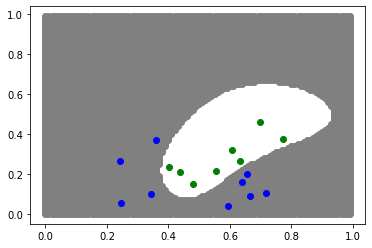

In [38]:
import  matplotlib.pyplot as plt
plt.scatter(disp_pos[:,0],disp_pos[:,1],c='white')
plt.scatter(disp_neg[:,0],disp_neg[:,1],c='grey')
plt.scatter(xigua30apos[:,0],xigua30apos[:,1],c='green')
plt.scatter(xigua30aneg[:,0],xigua30aneg[:,1],c='blue')
plt.show()

In [42]:
import  sklearn.datasets as datasets
boston = datasets.load_boston()
threshold = np.mean(boston.target)
y_classfiy=  [1 if yi > threshold else -1 for yi in boston.target]
xy = sklearn.model_selection.train_test_split(boston.data, y_classfiy, random_state=123)
model = SVC(kernel='rbf',C=10000000000,random_state=123)
model.fit(xy[0],xy[2])
print(model.score(xy[0],xy[2]),model.score(xy[1],xy[3]))

KeyboardInterrupt: 